In [1]:
import sys
sys.path.append("./utils/") # Adds higher directory to python modules path.
import random
import numpy as np
import cv2
import yaml
import glob, os
import loadcoraldata_utils as coralutils
import json
import importlib
from NeMO_generator import NeMOImageGenerator, ImageSetLoader
from osgeo import gdal
from sklearn.manifold import TSNE

from matplotlib import colors
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib notebook

IndentationError: unindent does not match any outer indentation level (loadcoraldata_utils.py, line 411)

In [2]:
jsonpath = './utils/CoralClasses.json'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
consolclass_count = dict((k, 0) for k in json_data["VedConsolidated_ClassDict"])

# cmap = colors.ListedColormap(['xkcd:red', 'xkcd:orange', 'xkcd:grey', 'xkcd:pink', 'xkcd:sky blue', 'xkcd:forest',
#                              'xkcd:tan', 'xkcd:olive', 'xkcd:blue', 'xkcd:white'])
cmap = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                              'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])

mosaics = [1,2,3,4,5,6,10,11,12,13,14,15,16,17,18,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]

output_trainpath = '../Images/Fiji_RGB_Patches_256/'
output_trainrefpath = '../Images/Fiji_RGBRef_Patches_256/'
if not os.path.exists(output_trainpath):
    os.makedirs(output_trainpath)
if not os.path.exists(output_trainpath):
    os.makedirs(output_trainrefpath)
output_trainfilename = 'rastertrain.txt'

for mosaic_count in mosaics:
    print("Mosaic Count: ", mosaic_count)
    imgpath = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_' + str(mosaic_count).zfill(3) + '.TIF'
    truthpath = '/home/shared/NeMO-Net Data/processed_Fiji_files/truth_classes_wcldMask_' + str(mosaic_count).zfill(3) + '.TIF'

#     imgpath = 'F:/Images/processed_Fiji_files/mosaiced_' + str(mosaic_count).zfill(3) + '.TIF'
#     truthpath = 'F:/Images/processed_Fiji_files/truth_classes_wcldMask_' + str(mosaic_count).zfill(3) + '.TIF'
#     output_trainpath = 'F:/Images/Fiji_RGB_Patches_256/'
#     output_trainrefpath = 'F:/Images/Fiji_RGBRef_Patches_256/'
#     output_trainfilename = 'rastertrain.txt'

    Fiji = coralutils.CoralData(imgpath, Truthpath=truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
    Fiji.Consolidate_classes(newclassdict=json_data["L3_ClassDict"], transferdict=json_data["Fiji2L3_Dict"])
    Fiji.Consolidate_classes(newclassdict=json_data["VedConsolidated_ClassDict"], transferdict=json_data["L32VedConsolidated_Dict"])
    
    max_R = np.max(Fiji.image[:,:,4])
    max_G = np.max(Fiji.image[:,:,2])
    max_B = np.max(Fiji.image[:,:,1])
    std_R = np.std(Fiji.image[:,:,4])
    std_G = np.std(Fiji.image[:,:,2])
    std_B = np.std(Fiji.image[:,:,1])
    mosaic_std = 1/255*np.asarray([200,200,200], dtype=np.float32)
    
    print("Outputing Training...")
    Fiji.export_segmentation_map(output_trainpath, output_trainrefpath, 
                                        output_trainfilename, image_size=256, N=10, lastchannelremove=False, 
                                        subdir=True, cont=True, consolidated = True, 
                                        mosaic_mean = [0,0,0], mosaic_std = mosaic_std, 
                                        bandstoexport= [5,3,2], exporttype=gdal.GDT_Byte, label_cmap=cmap)
    print("\n")
    # print("Outputing Validation...")
    # Fiji.export_segmentation_map(output_validpath, output_validrefpath, 
    #                                     output_validfilename, image_size=256, N=5, lastchannelremove=False, 
    #                                     subdir=True, cont=True, consolidated = True,
    #                                     mosaic_mean = mosaic_mean, mosaic_std = mosaic_std)
    
    for k in Fiji.consolidated_class_dict:
        consolclass_count[k] = consolclass_count[k] + Fiji.consolclass_count[k]
        
total_pixels = np.sum([consolclass_count[k] for k in Fiji.consolidated_class_dict])
consolclass_weights = dict((k, total_pixels/consolclass_count[k]) for k in Fiji.consolidated_class_dict)
for k in consolclass_weights:
    if consolclass_weights[k] == float("inf"):
        consolclass_weights[k] = 0

Mosaic Count:  1


./utils\loadcoraldata_utils.py:211: RuntimeWarning: divide by zero encountered in long_scalars
  self.consolclass_weights = dict((k, (self.truthimage_consolidated.shape[0]*self.truthimage_consolidated.shape[1])/(self.truthimage_consolidated==newclassdict[k]).sum()) for k in newclassdict)


Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  2
Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  3
Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  4
Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  5
Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  6
Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  10
Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  11
Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  12
Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  13
Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  14
Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  15
Outputing Training...
7 of 9 total classes found and saved


Mosaic Count:  16
Outputing Training...
7 of 9 total classes found and save

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in long_scalars


In [5]:
with open("init_args - Fijitest.yml", 'r') as stream:
    try:
        init_args = yaml.load(stream)
    except yaml.YAMLError as exc:
        print(exc)
        
train_loader = ImageSetLoader(**init_args['image_set_loader']['train'])
val_loader = ImageSetLoader(**init_args['image_set_loader']['val'])
if train_loader.color_mode == 'rgb':
    num_channels = 3
elif train_loader.color_mode == '8channel':
    num_channels = 8
y = train_loader.target_size[1]
x = train_loader.target_size[0]

pixel_mean =250*np.ones(num_channels)
pixel_std = 250*np.ones(num_channels)
datagen = NeMOImageGenerator(image_shape = (y,x,num_channels),
    image_resample=True, pixelwise_center=True,
    pixel_mean=pixel_mean, pixelwise_std_normalization=True,
    pixel_std=pixel_std)

train_generator = datagen.flow_from_NeMOdirectory(output_trainpath,
    target_size=(y,x),
    color_mode=train_loader.color_mode,
    passedclasses = Fiji.consolidated_class_dict,
    class_mode = 'categorical',
    batch_size = 50,
    shuffle=True)

Found 3740 images belonging to 17 classes, split into 39 consolidated classes.
class idx startend:  [[0, 220], [220, 440], [440, 660], [660, 880], [880, 1100], [1100, 1320], [1320, 1540], [1540, 1760], [1760, 1980], [1980, 2200], [2200, 2420], [2420, 2640], [2640, 2860], [2860, 3080], [3080, 3300], [3300, 3520], [3520, 3740]]


./utils\loadcoraldata_utils.py:211: RuntimeWarning: divide by zero encountered in long_scalars
  self.consolclass_weights = dict((k, (self.truthimage_consolidated.shape[0]*self.truthimage_consolidated.shape[1])/(self.truthimage_consolidated==newclassdict[k]).sum()) for k in newclassdict)


<IPython.core.display.Javascript object>


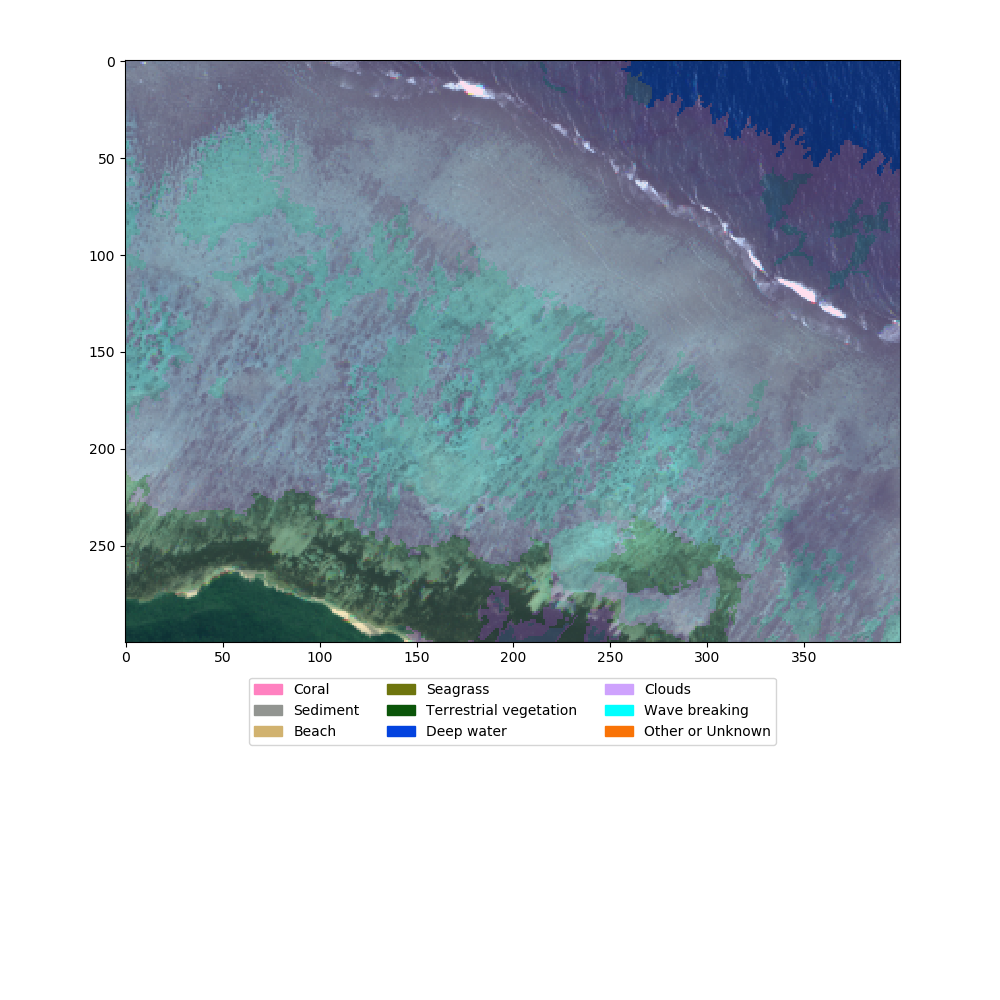

<IPython.core.display.Javascript object>


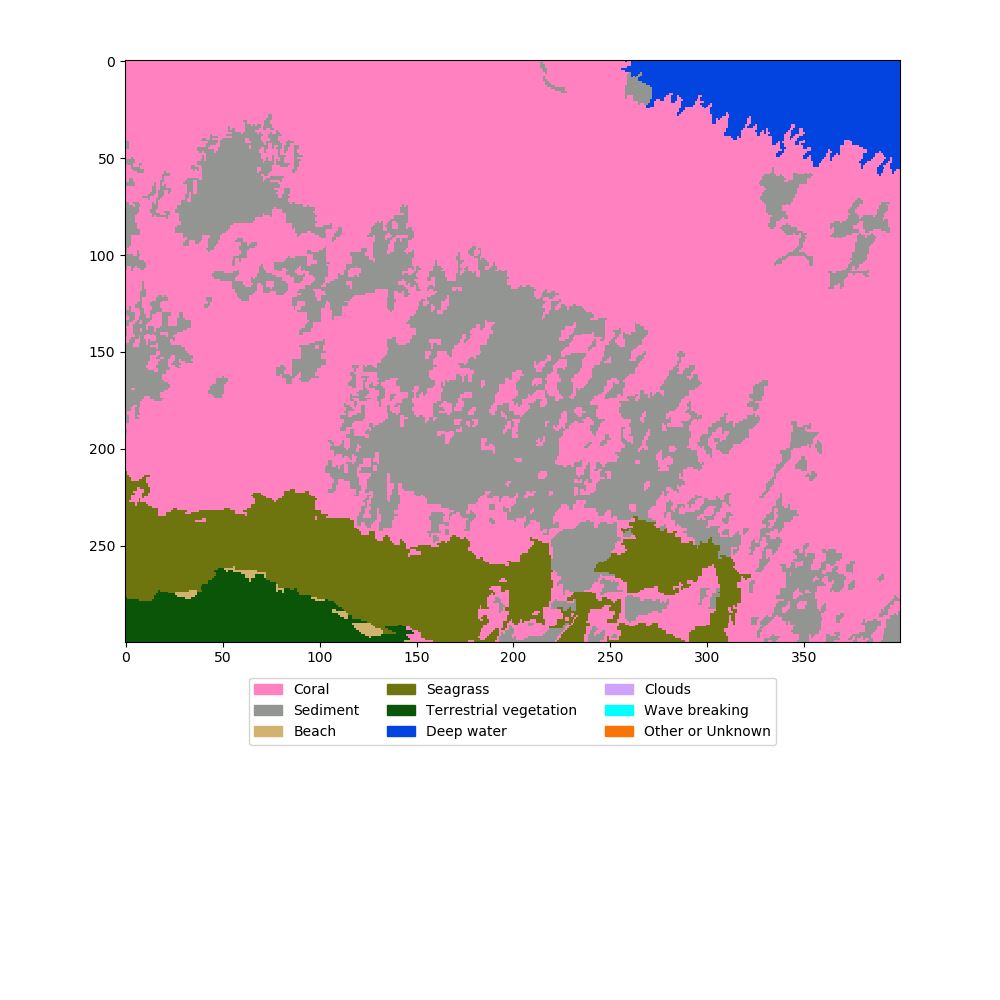

<IPython.core.display.Javascript object>


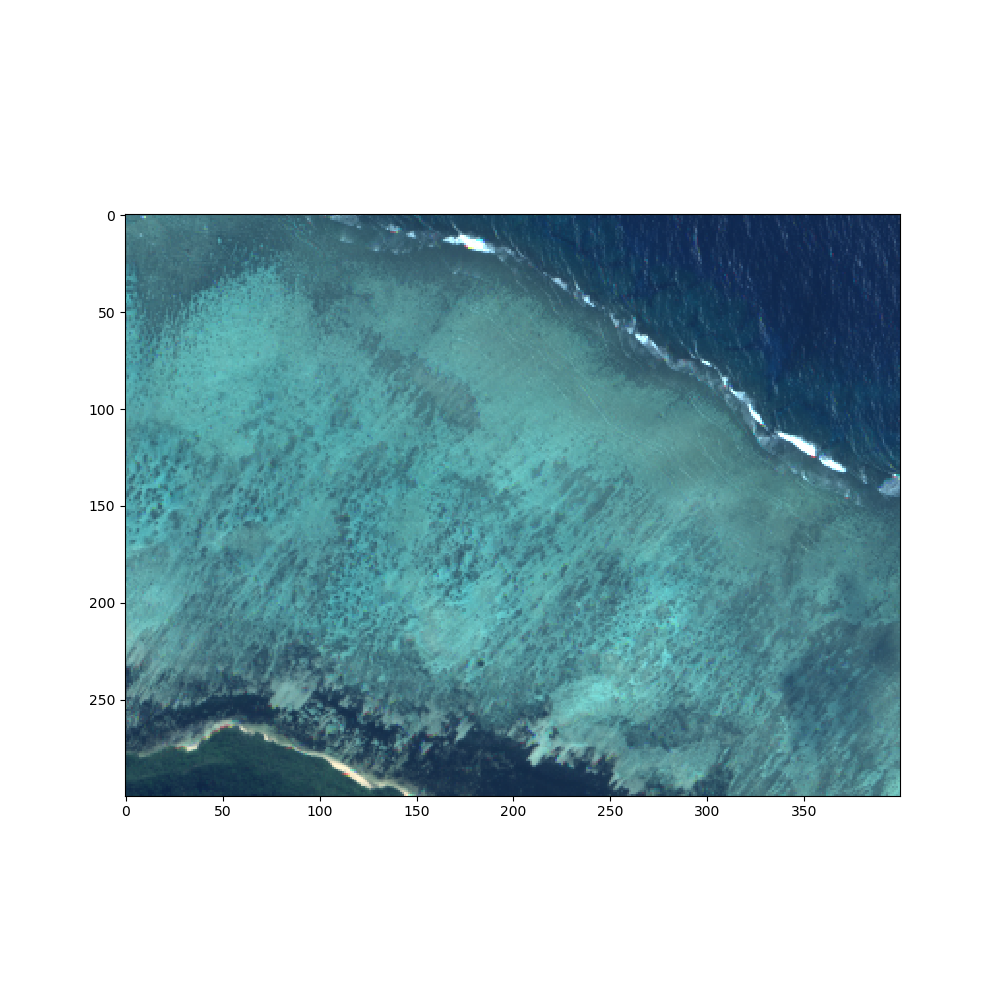

In [7]:
jsonpath = './utils/CoralClasses.json'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
consolclass_count = dict((k, 0) for k in json_data["L3_ClassDict"])

mosaic_count = 3
# cmap = colors.ListedColormap(['xkcd:mauve', 'xkcd:red', 'xkcd:magenta', 'xkcd:dark yellow', 'xkcd:dried blood',
#                              'xkcd:grey', 'xkcd:pink', 'xkcd:violet', 'xkcd:navy', 'xkcd:lime', 'xkcd:orange',
#                              'xkcd:yellow', 'xkcd:sky blue', 'xkcd:tan', 'xkcd:dark brown', 'xkcd:steel',
#                              'xkcd:forest', 'xkcd:olive', 'xkcd:neon green', 'xkcd:gold',
#                              'xkcd:black', 'xkcd:greenish yellow', 'xkcd:blue', 'xkcd:white'])
cmap = colors.ListedColormap(['xkcd:red', 'xkcd:orange', 'xkcd:grey', 'xkcd:pink', 'xkcd:sky blue', 'xkcd:forest',
                             'xkcd:tan', 'xkcd:olive', 'xkcd:blue', 'xkcd:white'])
cmap_nogrey = colors.ListedColormap(['xkcd:red', 'xkcd:orange', 'xkcd:pink', 'xkcd:sky blue', 'xkcd:forest',
                             'xkcd:tan', 'xkcd:olive', 'xkcd:blue', 'xkcd:white'])
cmap_Ved = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                                'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])
grey = np.asarray(np.asarray(cmap(2)[-2::-1])*255, dtype=np.uint8)
bounds = [i+0.5 for i in range(len(cmap_Ved.colors)+1)] # assumes labels start at 1
norm = colors.BoundaryNorm([b+0.5 for b in bounds], cmap_Ved.N)

imgpath = 'C:/NeMO-Net Data/processed_Fiji_files/mosaiced_001.TIF'
truthpath = 'C:/NeMO-Net Data/processed_Fiji_files/truth_classes_wcldMask_001.TIF'
# imgpath = 'F:/Images/processed_Fiji_files/mosaiced_' + str(mosaic_count).zfill(3) + '.TIF'
# truthpath = 'F:/Images/processed_Fiji_files/truth_classes_wcldMask_' + str(mosaic_count).zfill(3) + '.TIF'
# testpng = 'F:/Images/CopyLayer.png'

Fiji = coralutils.CoralData(imgpath, Truthpath=truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
Fiji.Consolidate_classes(newclassdict=json_data["L3_ClassDict"], transferdict=json_data["Fiji2L3_Dict"])
Fiji.Consolidate_classes(newclassdict=json_data["VedConsolidated_ClassDict"], transferdict=json_data["L32VedConsolidated_Dict"])
class_indices_rev = dict((v,k) for k,v in Fiji.consolidated_class_dict.items()) #flip k,v

# Stretch RGB image
patch_R = 255/200*Fiji.image[:,:,4]
patch_G = 255/200*Fiji.image[:,:,2]
patch_B = 255/200*Fiji.image[:,:,1]
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255
Fiji_RGB = np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3)
Fiji_RGB[Fiji_RGB > 255] = 255

# Remapping last remaining unlabeled set to something (grey in this case)
# remap = coralutils.fill_in_truthmap(testpng, cmap_nogrey, grey)
# truthmap = cv2.imread(testpng)

# fig = plt.figure(4,figsize=(10,10))
# ax = plt.subplot(111)
# ax.imshow(truthmap[...,::-1])
# plt.show()

# fig = plt.figure(5,figsize=(10,10))
# ax = plt.subplot(111)
# ax.imshow(remap[...,::-1])
# plt.show()

# Color plot of relevant area
fig = plt.figure(1,figsize=(10,10))
ax = plt.subplot(111)
ax.imshow(Fiji_RGB[800:1100,3400:3800,:])
ax.imshow(Fiji.truthimage_consolidated.astype(int)[800:1100,3400:3800], interpolation='nearest', cmap=cmap_Ved, norm=norm, alpha=0.25)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.2,
                 box.width, box.height])
ax.legend([mpatches.Patch(color=cmap_Ved(i)) for i in range(len(cmap.colors))],
           ['{}'.format(class_indices_rev[i+1]) for i in range(len(class_indices_rev))],
          loc='upper center', bbox_to_anchor=(0.5,-0.05), ncol=3)

fig = plt.figure(2,figsize=(10,10))
ax = plt.subplot(111)
ax.imshow(Fiji.truthimage_consolidated.astype(int)[800:1100,3400:3800], interpolation='nearest', cmap=cmap_Ved, norm=norm)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.2,
                 box.width, box.height])
ax.legend([mpatches.Patch(color=cmap_Ved(i)) for i in range(len(cmap.colors))],
           ['{}'.format(class_indices_rev[i+1]) for i in range(len(class_indices_rev))],
          loc='upper center', bbox_to_anchor=(0.5,-0.05), ncol=3)

fig = plt.figure(3,figsize=(10,10))
ax = plt.subplot(111)
ax.imshow(Fiji_RGB[800:1100,3400:3800,:])

plt.show()

# Data analysis stuff 

In [6]:
jsonpath = './utils/CoralClasses.json'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
consolclass_count = dict((k, 0) for k in json_data["L3_ClassDict"])
anchorlist = ['Terrestrial Vegetated', 'Deep Ocean Water']
    
for mosaic_count in range(11,12):
    print("Mosaic Count: ", mosaic_count)
    
    imgpath = 'F:/Images/processed_Fiji_files/mosaiced_' + str(mosaic_count).zfill(3) + '.TIF'
    truthpath = 'F:/Images/processed_Fiji_files/truth_classes_wcldMask_' + str(mosaic_count).zfill(3) + '.TIF'

    Fiji = coralutils.CoralData(imgpath, Truthpath=truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
    Fiji.Consolidate_classes(newclassdict=json_data["L3_ClassDict"], transferdict=json_data["Fiji2L3_Dict"])
    Fiji.Consolidate_classes(newclassdict=json_data["L3Consolidated_ClassDict"], transferdict=json_data["L32L3Consolidated_Dict"])
    Fiji.export_consolidated_truthmap('10truthclass_wcldMask_' + str(mosaic_count).zfill(3) + '.TIF')
    
    # TF_labelmap = [Fiji.truthimage_consolidated == json_data["L3_ClassDict"][k] for k in anchorlist]
    # test1 = np.transpose(Fiji.image[TF_labelmap[0]])
    
    # f, axs = plt.subplots(2,4)
    # axs = axs.ravel()
    # for i in range(8):
    #     axs[i].hist(test1[i], 50)
    # plt.show()
    
    # anchormean, anchorstd, anchormin, anchormax = Fiji.get_anchors(classdict = json_data["L3_ClassDict"], 
    #                                            anchorlist = ['Terrestrial Vegetated', 'Deep Ocean Water'])
    # print("anchormean: ", anchormean)
    # print("anchorstd: ", anchorstd)
    
    # mosaic_mean = np.mean(anchormean, axis=0)
    # mosaic_std = 3*np.max(anchorstd, axis=0)


Mosaic Count:  11


./utils\loadcoraldata_utils.py:209: RuntimeWarning: divide by zero encountered in long_scalars
  self.consolclass_weights = dict((k, (self.truthimage_consolidated.shape[0]*self.truthimage_consolidated.shape[1])/(self.truthimage_consolidated==newclassdict[k]).sum()) for k in newclassdict)


In [3]:
jsonpath = './utils/CoralClasses.json'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
consolclass_count = dict((k, 0) for k in json_data["L3_ClassDict"])
    
mosaic_count = 1

imgpath = 'F:/Images//processed_Fiji_files/mosaiced_' + str(mosaic_count).zfill(3) + '.TIF'
truthpath = 'F:/Images//processed_Fiji_files/truth_classes_wcldMask_' + str(mosaic_count).zfill(3) + '.TIF'
output_trainpath = 'F:/Images/Fiji_Training_Patches_256/'
output_trainrefpath = 'F:/Images/Fiji_TrainingRef_Patches_256/'
output_trainfilename = 'rastertrain.txt'
output_validpath = 'F:/Images/Fiji_Valid_Patches_256/'
output_validrefpath = 'F:/Images/Fiji_ValidRef_Patches_256/'
output_validfilename = 'rastervalid.txt'

Fiji = coralutils.CoralData(imgpath, Truthpath=truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
Fiji.Consolidate_classes(newclassdict=json_data["L3_ClassDict"], transferdict=json_data["Fiji2L3_Dict"])
anchormean, anchorstd, anchormin, anchormax = Fiji.get_anchors(classdict = json_data["L3_ClassDict"], 
                                            anchorlist = ['Terrestrial Vegetated', 'Deep Ocean Water'])
print(anchormean)
print(anchorstd)
print(anchormin)
print(anchormax)

mosaic_mean = np.mean(anchormean, axis=0)
#mosaic_std = np.max(np.asarray([np.abs(mosaic_mean-np.min(anchormin, axis=0)), 
#                                 np.abs(mosaic_mean-np.max(anchormax, axis=0))]), axis=0)
mosaic_std = 3*np.max(anchorstd, axis=0)

print(mosaic_mean)
print(mosaic_std)
#print(mosaic_std)

./utils\loadcoraldata_utils.py:209: RuntimeWarning: divide by zero encountered in long_scalars
  self.consolclass_weights = dict((k, (self.truthimage_consolidated.shape[0]*self.truthimage_consolidated.shape[1])/(self.truthimage_consolidated==newclassdict[k]).sum()) for k in newclassdict)


[[70.33851038 62.39089616 51.28461611 37.93664539 28.54001356 68.57705979
  98.3705201  64.83431537]
 [78.57274003 68.05375553 37.84517468 24.7897111  18.2206438  12.68950575
   8.36294837  5.08761512]]
[[ 4.83974174  8.51970409 13.46604955 13.82674467 13.63633485 24.07441796
  37.37691166 23.92296389]
 [ 5.10123353  7.28614854  7.06057988  6.52004772  6.1119665   4.87956036
   4.11007528  2.63110796]]
[[62.29278564 48.0397377  26.37708282 16.28001404 10.19975853 11.03012371
   9.03033066  6.02015162]
 [65.42045593 51.42715454 26.99050331 16.09912491  9.94476414  6.58743477
   3.11956882  1.80604553]]
[[361.76730347 496.41061401 411.19622803 364.12963867 406.97033691
  301.33685303 285.1942749  178.19648743]
 [283.83615112 351.36755371 318.77420044 291.05044556 270.54858398
  222.7472229  183.72618103 124.7375412 ]]
[74.45562521 65.22232585 44.56489539 31.36317825 23.38032868 40.63328277
 53.36673423 34.96096525]
[ 15.30370058  25.55911226  40.39814866  41.48023402  40.90900454
  72.22

[192 129 255]
[145 149 146]
[111 178 209]
[ 14 117 110]
[ 9 85 11]
[223  67   3]
[253 162 206]
[255 255   0]
[  6 115 249]


<IPython.core.display.Javascript object>


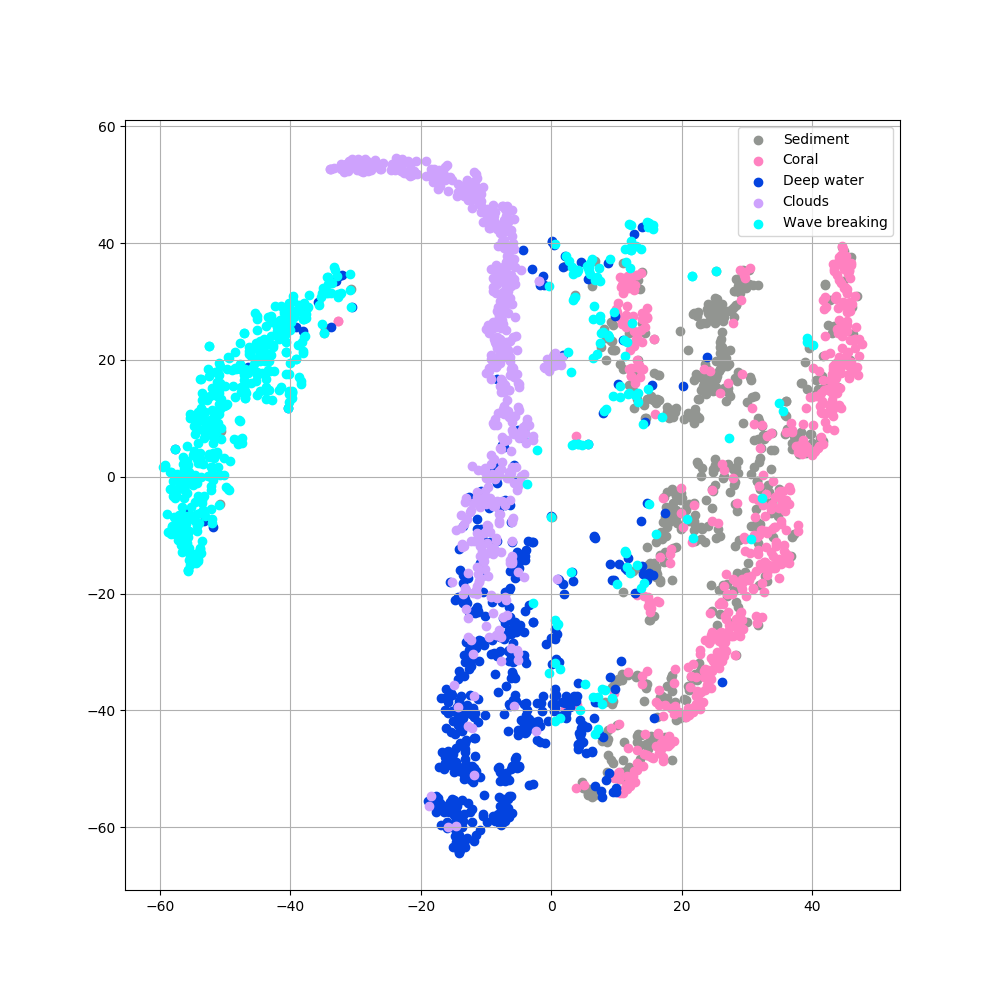

In [39]:
# TSNE
jsonpath = './utils/CoralClasses.json'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)

cmap_Ved = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                                'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])
cmap_Ved_uint8 = [np.asarray(np.asarray(cmap_Ved(i)[-2::-1])*255, dtype=np.uint8) for i in range(len(cmap_Ved.colors))]

finalpath_patch = "../Images/Jarrett_submissions/Patches"
finalpath_truthmap = "../Images/Jarrett_submissions/Truthmaps"
files_patch = [f for f in os.listdir(finalpath_patch) if os.path.isfile(os.path.join(finalpath_patch,f))]
files_truthmap = [f for f in os.listdir(finalpath_truthmap) if os.path.isfile(os.path.join(finalpath_truthmap,f))]

Fiji = coralutils.CoralData(os.path.join(finalpath_patch,files_patch[0]), 
                            Truthpath = os.path.join(finalpath_truthmap,files_truthmap[0]),
                            truth_key = json_data["VedConsolidated_ClassDict"], 
                            load_type="raster")
class_indices_rev = dict((v,k) for k,v in Fiji.class_dict.items()) #flip k,v

points, labels = Fiji.generate_randomized_points(500, consolidated = False, cmap=cmap_Ved)

tsne_results = TSNE(n_components=2, learning_rate= 100).fit_transform(points)
unique_labels = np.unique(labels, axis=0)
unique_labels_idx = [np.where(np.all(cmap_Ved_uint8 == u, axis=-1)) for u in unique_labels]
numpoints = int(len(points)/len(unique_labels))

fig = plt.figure(4,figsize=(10,10))
ax = plt.subplot(111)
for i in range(len(unique_labels)):
    ax.scatter(tsne_results[i*numpoints:(i+1)*numpoints,0], tsne_results[i*numpoints:(i+1)*numpoints,1], 
               color=unique_labels[i][::-1]/255, label=class_indices_rev[int(unique_labels_idx[i][0]+1)])
ax.legend()
ax.grid(True)

# fig = plt.figure(5,figsize=(10,10))
# ax = Axes3D(fig)
# for i in range(len(unique_labels)-1):
#     ax.scatter(points[i*numpoints:(i+1)*numpoints,4], points[i*numpoints:(i+1)*numpoints,2], 
#                points[i*numpoints:(i+1)*numpoints,1], color=cmap_Ved(unique_labels[i]-1))
    

# plt.show()


# ax.imshow(truthmap[...,::-1])
# plt.show()
# print(np.asarray(cmap(0)[-2::-1])*255)
# print(json_data["VedConsolidated_ClassDict"])
# testdict = {'Reef Crest - coralline algae ridge': 263.83293861316076, 'Fore-reef deep slope': 70.06211128410703, 'Fore-reef shallow slope': 151.81276890771184, 'Fore-reef shallow terrace': 190.9951447921521, 'Fore-reef octocorals-dominated (Caribbean)': 0, 'Back-reef pavement': 23.805211835880574, 'Back-reef coral framework': 504.06732475209594, 'Back-reef coral bommies': 767.9690461410341, 'Back-reef octocorals-dominated (Caribbean)': 0, 'Lagoon Pinnacle reefs': 190.52354241167194, 'Lagoon Patch reefs': 2340.5541997121954, 'Lagoon Fringing reefs': 121.64149633228104, 'Lagoon Deep water': 114.45460804976489, 'Fore-reef sand flats': 372.9389698456479, 'Back-reef sediment-dominated': 500.2607762487424, 'Lagoon sediment apron - Barren': 4.634798906159125, 'Terrestrial Vegetated': 13.120074519621062, 'Terrestrial Mangroves': 1099.7360264110896, 'Intertidal Wetlands': 4164.279931145626, 'Beach (sand)': 1230.0551785450966, 'Beach (rock)': 0, 'Seagrass Meadows': 263.06976897868566, 'Deep Ocean Water': 2.060391359758762, 'Other': 8.73977287635436}

In [35]:
print(unique_labels)
print(cmap_Ved_uint8)
print(len(points))
print(class_indices_rev)
# unique_labels_idx = [np.where(np.all(cmap_Ved_uint8 == u, axis=-1)) for u in unique_labels]
print(type(int(unique_labels_idx[2][0])))
print(class_indices_rev[int(unique_labels_idx[2][0])])

[[145 149 146]
 [192 129 255]
 [223  67   3]
 [253 162 206]
 [255 255   0]]
[array([192, 129, 255], dtype=uint8), array([145, 149, 146], dtype=uint8), array([111, 178, 209], dtype=uint8), array([ 14, 117, 110], dtype=uint8), array([ 9, 85, 11], dtype=uint8), array([223,  67,   3], dtype=uint8), array([253, 162, 206], dtype=uint8), array([255, 255,   0], dtype=uint8), array([  6, 115, 249], dtype=uint8)]
500
{1: 'Coral', 2: 'Sediment', 3: 'Beach', 4: 'Seagrass', 5: 'Terrestrial vegetation', 6: 'Deep water', 7: 'Clouds', 8: 'Wave breaking', 9: 'Other or Unknown'}
<class 'int'>
Terrestrial vegetation


(256, 256, 8)


<IPython.core.display.Javascript object>


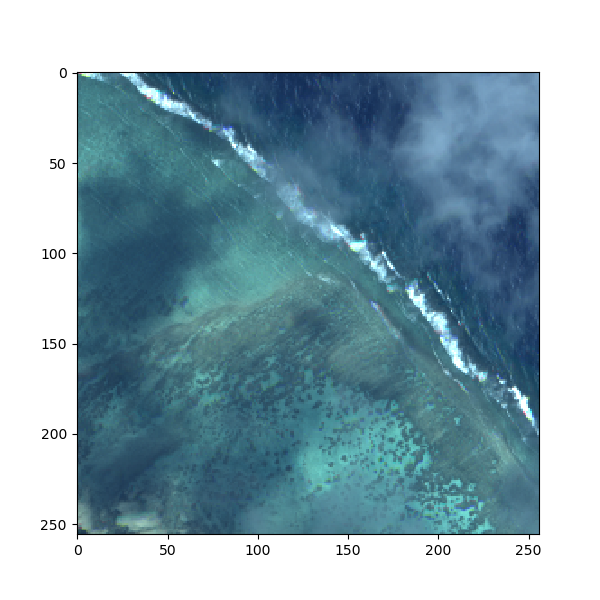

In [4]:
imagepath = "C:/NeMO-Net Data/processed_Fiji_files"
specific_fn = 'Coral_00000001.tif'
trainfile = "../Images/submissions 5-16-18/rastertrain.txt"
image_size = 256

patch = coralutils.load_specific_patch(imagepath, specific_fn, trainfile, image_size, offset=128)
print(patch.shape)
patch_R = 255/200*patch[:,:,4]
patch_G = 255/200*patch[:,:,2]
patch_B = 255/200*patch[:,:,1]
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255
patch_RGB = np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3)
fig = plt.figure(10,figsize=(6,6))
ax = plt.subplot(111)
ax.imshow(patch_RGB)
plt.show()


In [3]:
# Fill in truth maps as taken from Jarrett's submissions
imagepath = "F:/Images/processed_Fiji_files"
startpath = "../Images/submissions 6-5-18"
finalpath_RGB = "../Images/Jarrett_submissions/Original"
finalpath_patch = "../Images/Jarrett_submissions/Patches"
finalpath_truthmap = "../Images/Jarrett_submissions/Truthmaps_RGB"
rasterfile = "../Images/submissions 5-16-18/rastertrain.txt"
image_size = 256
offset = 128

alldir = [os.path.join(startpath,o) for o in os.listdir(startpath) if os.path.isdir(os.path.join(startpath,o))]
counter = 0
for d in alldir:
    files = [f for f in os.listdir(d) if os.path.isfile(os.path.join(d,f))]
    for f in files:
        fillmap = coralutils.fill_in_truthmap(os.path.join(d,f), 3)
        filestr = "Coral_" + str(counter).zfill(8) + ".png"
        cv2.imwrite(os.path.join(finalpath_truthmap,filestr), fillmap)
        
        filestr = "Coral_" + str(counter).zfill(8) + ".tif"
        patch, patch_proj, patch_gt = coralutils.load_specific_patch(imagepath, f, rasterfile, image_size, offset=offset)
        patch_R = 255/200*patch[:,:,4]
        patch_G = 255/200*patch[:,:,2]
        patch_B = 255/200*patch[:,:,1]
        patch_R[patch_R > 255] = 255
        patch_G[patch_G > 255] = 255
        patch_B[patch_B > 255] = 255
        patch_BGR = np.rollaxis(np.asarray([patch_B, patch_G, patch_R], dtype=np.uint8),0,3)
        cv2.imwrite(os.path.join(finalpath_RGB,filestr), patch_BGR)
        
        driver = gdal.GetDriverByName('GTiff')
        dataset = driver.Create(finalpath_patch + "/" + filestr, image_size, image_size, patch.shape[2], gdal.GDT_Float32)
        for chan in range(patch.shape[2]):
            dataset.GetRasterBand(chan+1).WriteArray((patch[:,:,chan]-100)/100)
            dataset.FlushCache()
        
        counter += 1
        print("Finished output for " + str(counter) + " images")


Finished output for 1 images
Finished output for 2 images
Finished output for 3 images
Finished output for 4 images
Finished output for 5 images
Finished output for 6 images
Finished output for 7 images
Finished output for 8 images
Finished output for 9 images
Finished output for 10 images
Finished output for 11 images
Finished output for 12 images
Finished output for 13 images
Finished output for 14 images
Finished output for 15 images
Finished output for 16 images
Finished output for 17 images
Finished output for 18 images
Finished output for 19 images
Finished output for 20 images
Finished output for 21 images
Finished output for 22 images


In [3]:
jsonpath = './utils/CoralClasses.json'
finalpath_truthmap = "../Images/Jarrett_submissions/Truthmaps_RGB"
Graypath = '../Images/Jarrett_submissions/Truthmaps_Gray'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
cmap_Ved = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                                'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])
coralutils.transform_RGB2Gray(finalpath_truthmap, Graypath, cmap_Ved, json_data["VedConsolidated_ClassDict"])

# grey = np.asarray(np.asarray(cmap(2)[-2::-1])*255, dtype=np.uint8)

In [5]:
test = cv2.imread('../Images/Jarrett_submissions/Truthmaps_Gray/Coral_00000000.png')
print(json_data["VedConsolidated_ClassDict"])
print(np.unique(test))

{'Coral': 1, 'Sediment': 2, 'Beach': 3, 'Seagrass': 4, 'Terrestrial vegetation': 5, 'Deep water': 6, 'Clouds': 7, 'Wave breaking': 8, 'Other or Unknown': 9}
[ 28  56 170 198 226]
